In [ ]:
import pandas as pd
import re
import matplotlib.pyplot as plt
from collections import defaultdict
from scipy.stats import pearsonr, spearmanr
import numpy as np


: 

In [5]:
test = pd.read_csv("/Users/fstankat/Downloads/2025-08-10-Rohdaten von Umfrage Disy_Masterarbeitsumfrage_1it (alle Teilnehmer).csv", sep = ";")

a) Genauigkeit der Daten

b) Relevanz und Fokus

c) Struktur und Organisation

d) Flüssigkeit - Lesbarkeit und Verständlichkeit

e) Allgemeine Qualität des LLM 

f) Problemfelder

g) Produktionsreife

h) Produktionsreife 

i) Berichtsvariationen



## Daten bereingen

### Tabellen Überschriften bereinigen

In [ ]:
def clean_headers(text):

    match = re.search(r'(\d+)\.([a-zA-Z])\)', text)

    if match:
        transformed = f"{match.group(1)} - {match.group(2)}"



    return transformed if match else text

In [8]:
test.columns = [clean_headers(header) for header in test.columns]

In [ ]:
pattern = r'^\d+\s*-\s*[a-zA-Z]$'

matching_columns = test.columns[test.columns.str.match(pattern)]

In [10]:
df = test[matching_columns]

### Extrahieren der Freitextfelder

In [11]:
f_g_df = df.loc[:, df.columns.str.contains('- f|- g')]

In [12]:
f_g_df

,1 - f,1 - f,1 - f,1 - f,1 - g,2 - f,2 - f,2 - f,2 - f,2 - g,...,14 - f,14 - f,14 - f,14 - f,14 - g,15 - f,15 - f,15 - f,15 - f,15 - g
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Die Einbindung der Ranking Ergebnisse in den F...,Der Folgende Absatz: 'Die durchschnittliche Te...,Die Einbindung der Ranking Ergebnisse in den F...,Der Folgende Absatz: 'Die durchschnittliche Te...,Der Formulierungen im Text sind gut geworden. ...,Auch hier treten wieder Probleme in der einord...,Diese Absatz verdeutlicht das Problem: ' zu lä...,Auch hier treten wieder Probleme in der einord...,Diese Absatz verdeutlicht das Problem: ' zu lä...,"Die Daten sind richtig wiedergegeben, das Prob...",...,Eine unklare Region war zu finden,NaN,Eine unklare Region war zu finden,NaN,fast,Unklare Regionen und nicht definierte Werte,Z.B. 'was eine erhebliche Abweichung von bis z...,Unklare Regionen und nicht definierte Werte,Z.B. 'was eine erhebliche Abweichung von bis z...,weniger
2,"Satzbau manchmal ungenau, Wiederholungen, unge...",Der Begriff 'signifikant' sollte nur dann verw...,"Satzbau manchmal ungenau, Wiederholungen, unge...",Der Begriff 'signifikant' sollte nur dann verw...,Die allgemeine Beschreibung der klimatischen P...,"eigentlich keine, viel besser und flüssiger al...",ein Vergleich der Kenntage mit anderen Messsta...,"eigentlich keine, viel besser und flüssiger al...",ein Vergleich der Kenntage mit anderen Messsta...,"Sprache und Satzbau sind gut, nur manchmal wir...",...,"recht viele Wortwiederholungen, vereinzelt inh...","Nur dann von Signifikanz sprechen, wenn ein st...","recht viele Wortwiederholungen, vereinzelt inh...","Nur dann von Signifikanz sprechen, wenn ein st...",Insgesamt eine runde Darstellung des Witterung...,keine,"Nur dann von Signifikanz sprechen, wenn ein st...",keine,"Nur dann von Signifikanz sprechen, wenn ein st...","Texte sind sprachlich sehr gut, die meisten Sc..."
3,Der Text wirft fröhliche Witterung und Klima d...,In diesem Kontext ist das Wort 'signifikant' f...,Der Text wirft fröhliche Witterung und Klima d...,In diesem Kontext ist das Wort 'signifikant' f...,"Die Srtuktur ist ok, auch die generelle Nennun...",Bitte das Wort 'signifikant' streichen. Es wer...,Gerade auch bei den LUQS-Stationen im letzten ...,Bitte das Wort 'signifikant' streichen. Es wer...,Gerade auch bei den LUQS-Stationen im letzten ...,"Deutlich esser als die erste Version, aber noc...",...,Wie zuvor beschrieben,Wie zuvor beschrieben,Wie zuvor beschrieben,Wie zuvor beschrieben,Wie zuvor beschrieben,wie zuvor beschrieben,wie zuvor beschrieben,wie zuvor beschrieben,wie zuvor beschrieben,wie zuvor beschrieben
4,1.) Es wird von Signifikanz gesprochen. Diesen...,"1.) Signifikanz weglassen, 2.) nicht von klima...",1.) Es wird von Signifikanz gesprochen. Diesen...,"1.) Signifikanz weglassen, 2.) nicht von klima...","GUT: Die Beschreibung der Jahreswerte, im Verg...",1. 'Diese Entwicklungen bestätigen eine klimat...,Nicht von Signifikanz oder Trend reden (Trends...,1. 'Diese Entwicklungen bestätigen eine klimat...,Nicht von Signifikanz oder Trend reden (Trends...,"GUT: Die Beschreibung der Jahreswerte, im Verg...",...,1.) warum 2. höchster Jahresdurchschnitt??? 20...,NaN,1.) warum 2. höchster Jahresdurchschnitt??? 20...,NaN,"gut: Beschreibung, Überarbeitung: Schlussfolge...","1.) warum 2. Platz bei Temperaturreihe?!, 2.) ...",Dramatisierung: 'besorgniserregender Aufwärtst...,"1.) warum 2. Platz bei Temperaturreihe?!, 2.) ...",Dramatisierung: 'besorgniserregender Aufwärtst...,"GUT: Beschreibung, Überarbeitung: SChlussfolge..."
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,"Zu viel Prosa an einigen Stellen, könnte man d...",Einzelne Begriffe passen nicht in die Zusammen...,"Zu viel Prosa an einigen Stellen, könnte man d...",Einzelne Begriffe passen nicht in die Zusammen...,Der Teasertext ist viel zu lang und nimmt quas...,"Auch hier zu viele Details im Teasertext, insg...

In [13]:
# f_g_df.to_excel("text_result.xlsx")

### Extrahieren der Numerischen Werte

In [14]:
df = df.loc[:, ~ df.columns.str.contains('- f|- g')]

In [15]:
# get numerical values
for i, v in enumerate(df.columns):
    if re.match(r'^\d+\s*-\s*[abcdhe]$', v):
        df[v] = df[v].apply(lambda x: x[0] if isinstance(x, str) and len(x) > 0 else x)



In [16]:
df

,1 - a,1 - b,1 - c,1 - d,1 - e,1 - h,2 - a,2 - b,2 - c,2 - d,...,14 - c,14 - d,14 - e,14 - h,15 - a,15 - b,15 - c,15 - d,15 - e,15 - h
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,5,5,4,3,5,4,5,5,4,5,...,5,5,5,5,4,4,4,4,4,4
2,4,5,6,4,4,4,5,6,6,5,...,6,5,4,5,5,6,6,6,6,5
3,6,4,5,3,2,1,6,4,5,5,...,5,3,2,3,5,4,5,3,2,3
4,6,5,5,6,2,1,6,5,6,6,...,NaN,NaN,NaN,1,NaN,5,6,5,2,1
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,5,5,4,4,4,3,5,5,4,3,...,NaN,NaN,2,3,4,4,4,3,3,3
7,4,5,5,4,4,3,6,5,5,5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


#### Varianzanalyse der Berichtsqualität und Produktionsreife

In [17]:
df_e = df[["1 - e", "2 - e", "3 - e", "4 - e", "5 - e", "6 - e", "7 - e", 
             "8 - e", "9 - e", "10 - e", "11 - e", "12 - e", "13 - e", "14 - e", "15 - e"]]

In [18]:
df_h = df[["1 - h", "2 - h", "3 - h", "4 - h", "5 - h", "6 - h", "7 - h", 
             "8 - h", "9 - h", "10 - h", "11 - h", "12 - h", "13 - h", "14 - h", "15 - h"]]

In [19]:
df_h

,1 - h,2 - h,3 - h,4 - h,5 - h,6 - h,7 - h,8 - h,9 - h,10 - h,11 - h,12 - h,13 - h,14 - h,15 - h
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,4,5,3,5,5,3,5,4,3,4,6,3,5,5,4
2,4,5,5,5,6,4,4,5,4,4,4,3,3,5,5
3,1,3,1,3,3,3,3,3,3,3,3,3,3,3,3
4,1,4,3,2,1,1,2,1,2,3,3,3,1,1,1
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,3,3,3,3,3,3,NaN,NaN,NaN,3,NaN,NaN,3,3,3
7,3,5,4,3,4,3,3,4,3,3,3,3,3,NaN,NaN


In [20]:
df_e

,1 - e,2 - e,3 - e,4 - e,5 - e,6 - e,7 - e,8 - e,9 - e,10 - e,11 - e,12 - e,13 - e,14 - e,15 - e
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,5,5,4,5,6,4,5,4,4,4,6,4,5,5,4
2,4,5,5,5,6,5,5,6,4,5,4,3,2,4,6
3,2,3,1,1,1,1,2,2,2,2,2,2,2,2,2
4,2,4,3,2,2,1,2,2,2,2,2,NaN,2,NaN,2
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,4,3,2,3,3,3,NaN,NaN,NaN,3,NaN,NaN,2,2,3
7,4,6,4,4,4,3,3,4,3,3,3,3,3,NaN,NaN


Berechnung der Varianz für Berichtsqualität

In [21]:
def convert_to_numeric_safe(df):
    """
    Konvertiert alle Spalten des DataFrames sicher zu numerischen Werten.
    Nicht-konvertierbare Werte werden zu NaN.
    """
    df_numeric = df.copy()
    for column in df_numeric.columns:
        df_numeric[column] = pd.to_numeric(df_numeric[column], errors='coerce')
    return df_numeric

# DataFrame in numerische Werte umwandeln
df_numeric = convert_to_numeric_safe(df_e)

# Varianz-Berechnung für alle Spalten (schnelle Übersicht)
variances = df_numeric.var()

# Detaillierte Analyse für jede Spalte
column_stats = []

for column in df_numeric.columns:
    numeric_col = pd.to_numeric(df_numeric[column], errors='coerce')
    valid_values = numeric_col.dropna()
    nan_count = numeric_col.isna().sum()
    valid_count = valid_values.count()

    # Statistiken nur berechnen, wenn mindestens 2 Werte vorhanden sind
    if valid_count >= 2:
        stats = {
            'spalte': column,
            'anzahl_gueltig': valid_count,
            'anzahl_nan': nan_count,
            'min': valid_values.min(),
            'max': valid_values.max(),
            'mittelwert': valid_values.mean(),
            'varianz': valid_values.var(),
            'std_abweichung': valid_values.std()
        }
    elif valid_count == 1:
        stats = {
            'spalte': column,
            'anzahl_gueltig': 1,
            'anzahl_nan': nan_count,
            'min': valid_values.iloc[0],
            'max': valid_values.iloc[0],
            'mittelwert': valid_values.iloc[0],
            'varianz': np.nan,
            'std_abweichung': np.nan
        }
    else:
        stats = {
            'spalte': column,
            'anzahl_gueltig': 0,
            'anzahl_nan': nan_count,
            'min': np.nan,
            'max': np.nan,
            'mittelwert': np.nan,
            'varianz': np.nan,
            'std_abweichung': np.nan
        }
    column_stats.append(stats)

# Ergebnisse als DataFrame ausgeben
summary_df = pd.DataFrame(column_stats)



In [22]:
summary_df

,spalte,anzahl_gueltig,anzahl_nan,min,max,mittelwert,varianz,std_abweichung
0,1 - e,6,2,2.0,5.0,3.500000,1.500000,1.224745
1,2 - e,6,2,3.0,6.0,4.333333,1.466667,1.211060
2,3 - e,6,2,1.0,5.0,3.166667,2.166667,1.471960
3,4 - e,6,2,1.0,5.0,3.333333,2.666667,1.632993
4,5 - e,6,2,1.0,6.0,3.666667,4.266667,2.065591
5,6 - e,6,2,1.0,5.0,2.833333,2.566667,1.602082
6,7 - e,5,3,2.0,5.0,3.400000,2.300000,1.516575
7,8 - e,5,3,2.0,6.0,3.600000,2.800000,1.673320
8,9 - e,5,3,2.0,4.0,3.000000,1.000000,1.000000
9,10 - e,6,2,2.0,5.0,3.166667,1.366667,1.169045


In [23]:
# sortiere nach höchste std
df_sorted = summary_df.sort_values('std_abweichung', ascending=False).head(40)

In [24]:
# Berechne Abweichungen der Notenskala
df_sorted["sorted"] = df_sorted["max"] - df_sorted["min"]

In [25]:
df_sorted = df_sorted.sort_values('sorted', ascending=False).head(40)

In [26]:
df_sorted

,spalte,anzahl_gueltig,anzahl_nan,min,max,mittelwert,varianz,std_abweichung,sorted
4,5 - e,6,2,1.0,6.0,3.666667,4.266667,2.065591,5.0
7,8 - e,5,3,2.0,6.0,3.600000,2.800000,1.673320,4.0
10,11 - e,5,3,2.0,6.0,3.400000,2.800000,1.673320,4.0
14,15 - e,5,3,2.0,6.0,3.400000,2.800000,1.673320,4.0
3,4 - e,6,2,1.0,5.0,3.333333,2.666667,1.632993,4.0
5,6 - e,6,2,1.0,5.0,2.833333,2.566667,1.602082,4.0
2,3 - e,6,2,1.0,5.0,3.166667,2.166667,1.471960,4.0
6,7 - e,5,3,2.0,5.0,3.400000,2.300000,1.516575,3.0
13,14 - e,4,4,2.0,5.0,3.250000,2.250000,1.500000,3.0
0,1 - e,6,2,2.0,5.0,3.500000,1.500000,1.224745,3.0


Löschen von NAN Reihen

In [ ]:
df.drop([0, 5], inplace=True) 


In [68]:
df

1                 2            ...   14                  15                 \
   a  b  c  d  e  h  a  b  c  d  ...    c    d    e    h    a    b    c    d   
1  5  5  4  3  5  4  5  5  4  5  ...    5    5    5    5    4    4    4    4   
2  4  5  6  4  4  4  5  6  6  5  ...    6    5    4    5    5    6    6    6   
3  6  4  5  3  2  1  6  4  5  5  ...    5    3    2    3    5    4    5    3   
4  6  5  5  6  2  1  6  5  6  6  ...  NaN  NaN  NaN    1  NaN    5    6    5   
6  5  5  4  4  4  3  5  5  4  3  ...  NaN  NaN    2    3    4    4    4    3   
7  4  5  5  4  4  3  6  5  5  5  ...  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN   

             
     e    h  
1    4    4  
2    6    5  
3    2    3  
4    2    1  
6    3    3  
7  NaN  NaN  

[6 rows x 90 columns]

### Daten in Multiindex Format bringen für Plots

In [28]:
def split_col(col):
    match = re.match(r'^\s*(\d+)\s*-\s*([a-zA-Z])\s*$', col)
    if match:
        return (int(match.group(1)), match.group(2))  
    else:
        return (col, '') 

df.columns = pd.MultiIndex.from_tuples([split_col(col) for col in df.columns])




# Plots für Masterarbeit


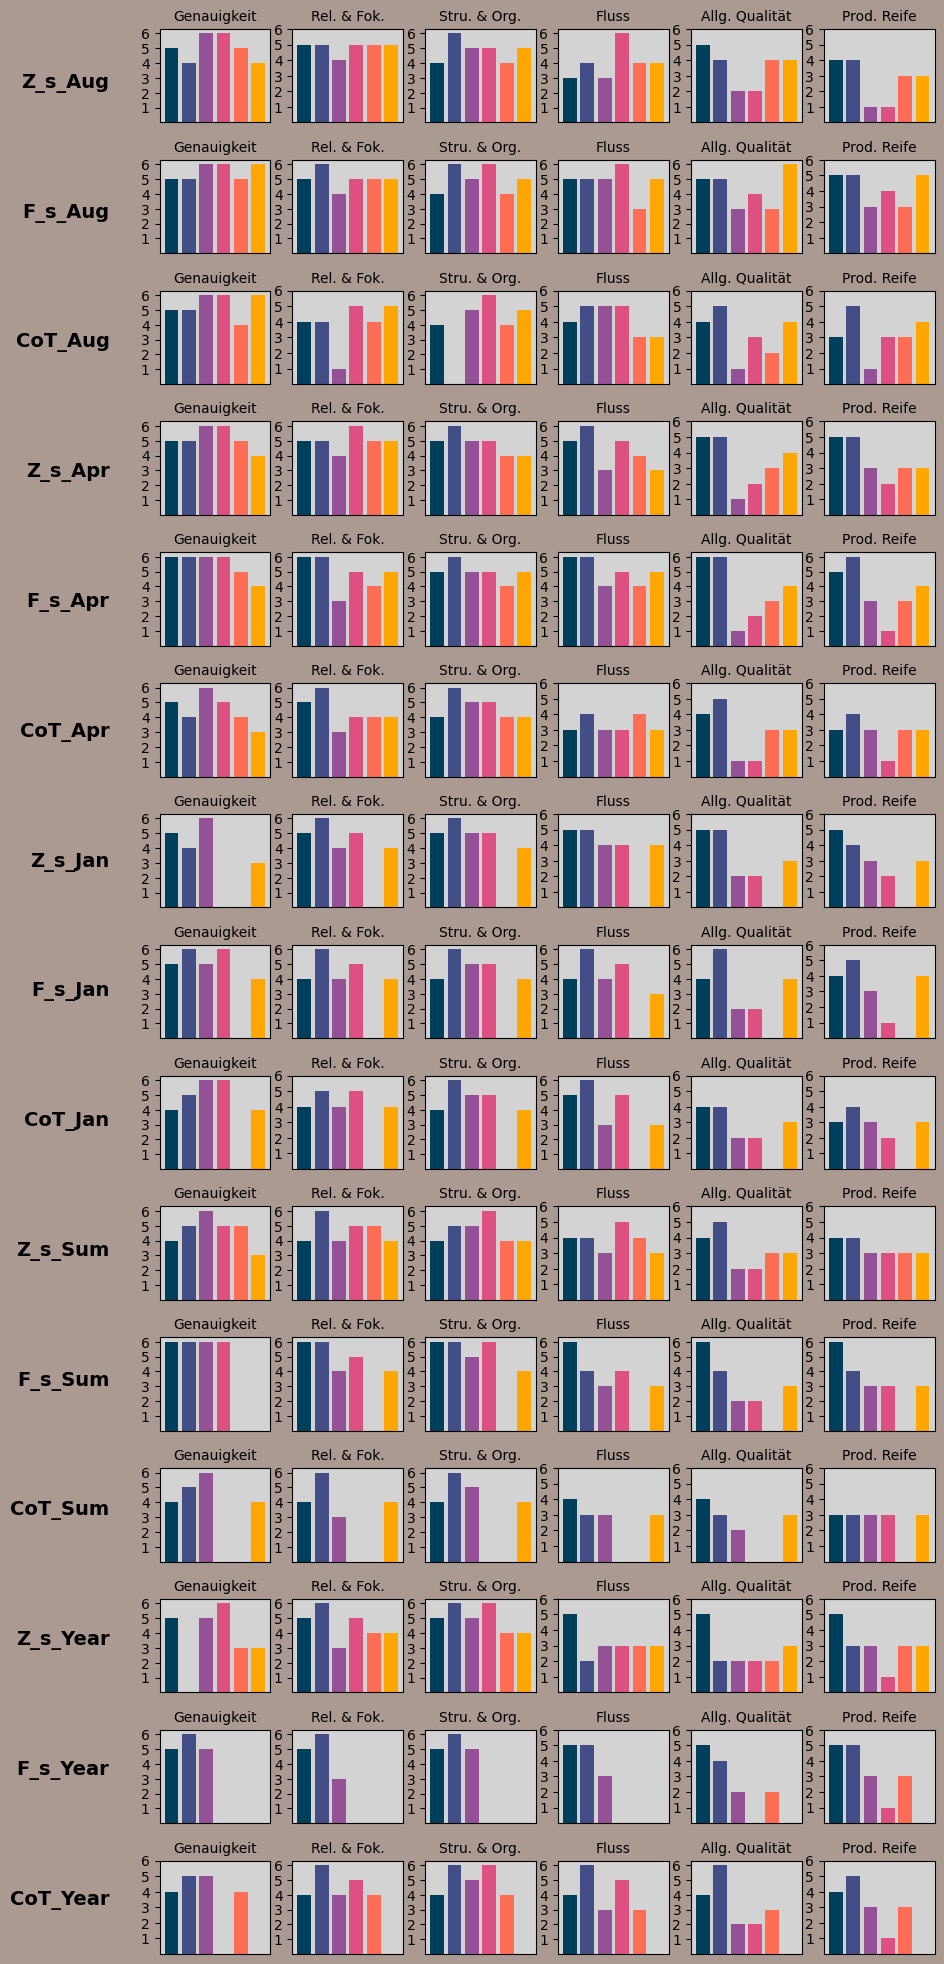

In [29]:
fig, axes = plt.subplots(15, 6, figsize=(10, 25))
row_titles = ['Z_s_Aug', 'F_s_Aug', 'CoT_Aug', 'Z_s_Apr', 'F_s_Apr', 'CoT_Apr', 'Z_s_Jan', 'F_s_Jan', 
              'CoT_Jan', 'Z_s_Sum', 'F_s_Sum', 'CoT_Sum', 'Z_s_Year', 'F_s_Year', 'CoT_Year']  

color_pal = ["#003f5c", "#444e86", "#955196", "#dd5182", "#ff6e54", "#ffa600"]
Header_names = ["Genauigkeit", "Rel. & Fok.", "Stru. & Org.", "Fluss", "Allg. Qualität", "Prod. Reife"]
fig.patch.set_facecolor('#aa9a92')
df_test = df.copy()

for i in range(1, 16): 


    cols = df_test[i].columns

    df_single = df_test[i].fillna(0).astype(int).reset_index(drop=True)


    for v, col in enumerate(cols):
        row_index = i - 1

        axes[row_index][v].set_facecolor('lightgrey') 
        axes[row_index][v].bar(df_single[col].index, df_single[col], color = color_pal,)
        axes[row_index][v].set_title(Header_names[v], fontsize = 10 )
        axes[row_index][v].set_xticks([])
        axes[row_index][v].set_yticks([1, 2, 3, 4, 5, 6])

for i in range(15):


    left_pos = axes[i, 0].get_position().x0 
    vert_pos = (axes[i, 0].get_position().y0 + axes[i, 0].get_position().y1) / 2  
    
    fig.text(left_pos - 0.05, vert_pos, row_titles[i], 
             fontsize=14, fontweight='bold', 
             ha='right', va='center',  
             rotation='horizontal') 

plt.subplots_adjust(hspace=0.4, wspace=0.2) 
plt.show()


/var/folders/jp/ggxclxyx4v5bp09212nllfrm0000gn/T/ipykernel_13847/2522650209.py:26: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[index].set_xticklabels(Header_names)
/var/folders/jp/ggxclxyx4v5bp09212nllfrm0000gn/T/ipykernel_13847/2522650209.py:26: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[index].set_xticklabels(Header_names)
/var/folders/jp/ggxclxyx4v5bp09212nllfrm0000gn/T/ipykernel_13847/2522650209.py:26: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[index].set_xticklabels(Header_names)
/var/folders/jp/ggxclxyx4v5bp09212nllfrm0000gn/T/ipykernel_13847/2522650209.py:26: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[index].set_xtickl

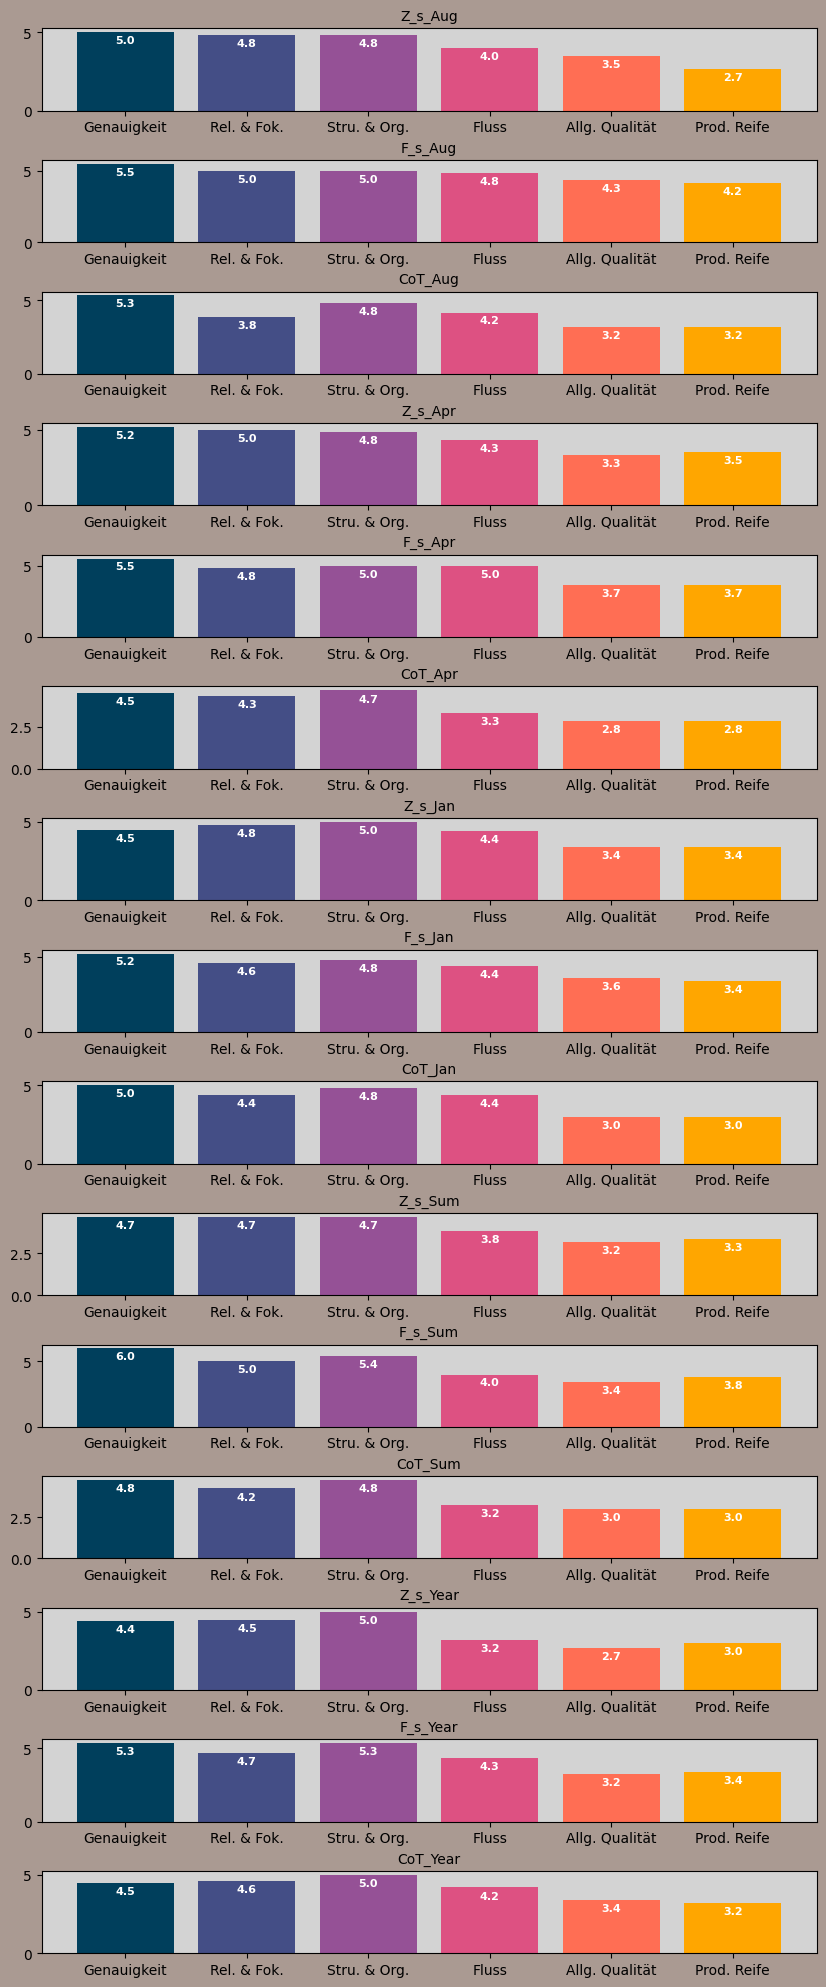

In [ ]:
fig, axes = plt.subplots(15, 1, figsize=(10, 25))
row_titles = ['Z_s_Aug', 'F_s_Aug', 'CoT_Aug', 'Z_s_Apr', 'F_s_Apr', 'CoT_Apr', 'Z_s_Jan', 'F_s_Jan', 
              'CoT_Jan', 'Z_s_Sum', 'F_s_Sum', 'CoT_Sum', 'Z_s_Year', 'F_s_Year', 'CoT_Year'] 
Header_names = ["Genauigkeit", "Rel. & Fok.", "Stru. & Org.", "Fluss", "Allg. Qualität", "Prod. Reife"]

color_pal = ["#003f5c", "#444e86", "#955196", "#dd5182", "#ff6e54", "#ffa600"]

fig.patch.set_facecolor('#aa9a92')
df_test = df.copy()

axes = axes.flatten()  


for i in range(1, 16): 



    df_single = df_test[i].fillna(0).astype(int).reset_index(drop=True)

    df_single = df_single[df_single != 0].mean()
    index = i -1

    axes[index].set_facecolor('lightgrey') 
    axes[index].bar(df_single.index, df_single.values, color = color_pal,)
    axes[index].set_title(row_titles[index], fontsize = 10 )
    axes[index].set_xticklabels(Header_names)

    for i, bar in enumerate(axes[index].patches): 
        height = bar.get_height() 
        axes[index].text(bar.get_x() + bar.get_width() / 2, height - 0.2,  
                     str(round(df_single.iloc[i], 1)), color = "white", ha='center', va='top', fontsize=8, fontweight="bold")
        



plt.subplots_adjust(hspace=0.6, wspace=0.2) 
plt.show()


/var/folders/jp/ggxclxyx4v5bp09212nllfrm0000gn/T/ipykernel_13847/3205086130.py:37: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[index].set_xticklabels(Header_names)
/var/folders/jp/ggxclxyx4v5bp09212nllfrm0000gn/T/ipykernel_13847/3205086130.py:37: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[index].set_xticklabels(Header_names)
/var/folders/jp/ggxclxyx4v5bp09212nllfrm0000gn/T/ipykernel_13847/3205086130.py:37: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[index].set_xticklabels(Header_names)


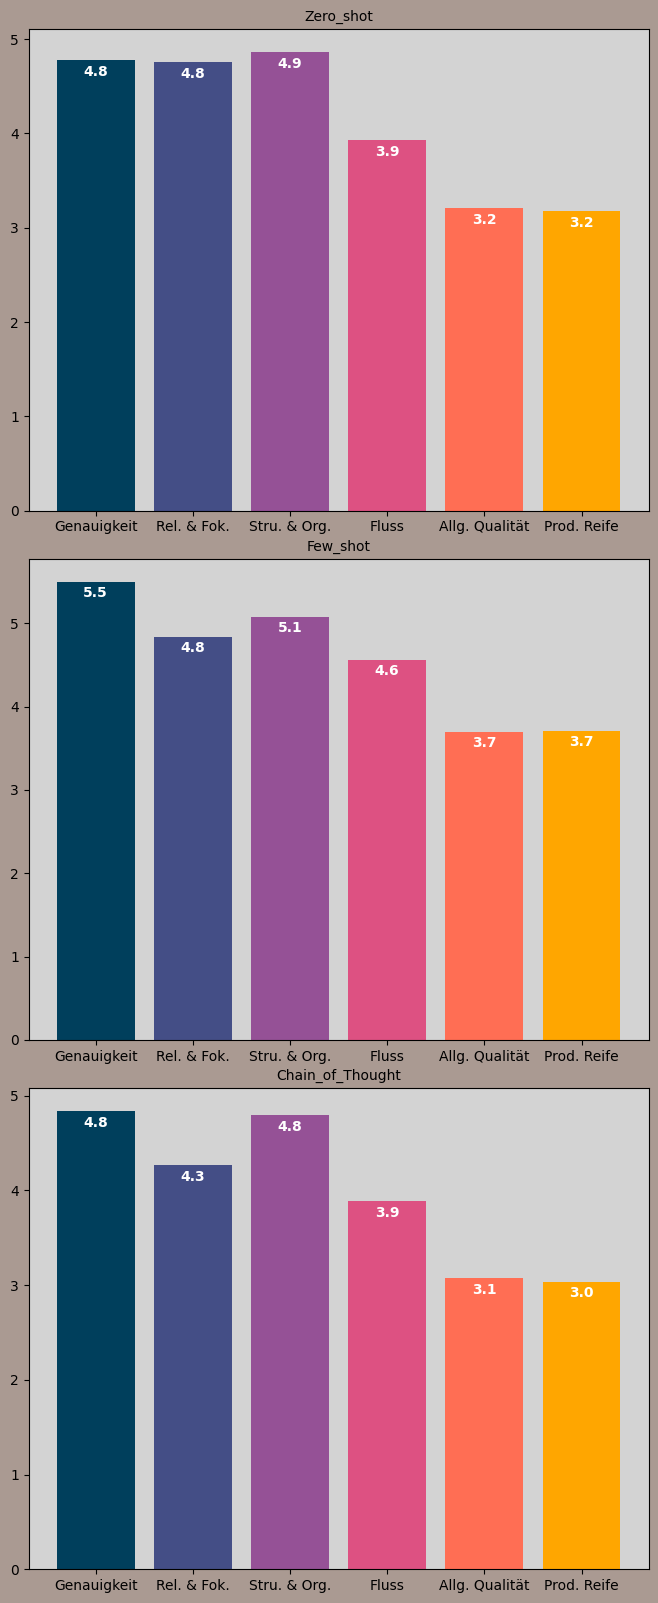

In [31]:
fig, axes = plt.subplots(3, 1, figsize=(8, 20))
row_titles = ['Zero_shot', 'Few_shot', 'Chain_of_Thought']
Header_names = ["Genauigkeit", "Rel. & Fok.", "Stru. & Org.", "Fluss", "Allg. Qualität", "Prod. Reife"]

color_pal = ["#003f5c", "#444e86", "#955196", "#dd5182", "#ff6e54", "#ffa600"]

fig.patch.set_facecolor('#aa9a92')
df_test = df.copy()

Groups = [[1,4,7,10,13], [2,5,8,11,14], [3,6,9,12,15]]


df_groups = []

for group in Groups:

    df_prev = None

    for df_v in group:
        df_acc = df_test[df_v].fillna(0).astype(int).reset_index(drop=True)

        if df_prev is not None:
            df_prev = pd.concat([df_prev, df_acc], ignore_index=True)
        else:
            df_prev = df_acc

    df_groups.append(df_prev)


for i, group in enumerate(df_groups):
    df_single = group[group != 0].mean()
    index = i 

    axes[index].set_facecolor('lightgrey') 
    axes[index].bar(df_single.index, df_single.values, color = color_pal,)
    axes[index].set_title(row_titles[index], fontsize = 10 )
    axes[index].set_xticklabels(Header_names)

    
    for i, bar in enumerate(axes[index].patches):  
        height = bar.get_height()  #
        axes[index].text(bar.get_x() + bar.get_width() / 2, height - 0.05, 
                        str(round(df_single.iloc[i], 1)), color = "white", ha='center', va='top', fontsize=10, fontweight="bold")
        

    
plt.subplots_adjust(hspace=0.1, wspace=0.2) 
plt.show()

    
    
    


# G-Eval

Extrahieren der Werte von G-Eval Evaluation

In [ ]:
from pathlib import Path
import re

base_dir = Path("/Users/fstankat/Projects/Disy-Master-Lanuk/Lanuk-Backend/src/evaluation/Evaluation_G_Eval")  

# Regex extrahiere nummer in Klammern [5]
pattern = re.compile(r"\[(\d+)\]")

# Mappe keywords 
key_map = {
    "genau": "Genauigkeit_der_daten",
    "flüssig": "Flüssigkeit_Lesbarkeit",
    "lesbar": "Flüssigkeit_Lesbarkeit",
    "relev": "Relevanz_Fokus",
    "fokus": "Relevanz_Fokus",
    "struktur": "Struktur_Organisation",
    "org": "Struktur_Organisation"
}

# Extrahiere Werte
results = {}

for subfolder in base_dir.iterdir():
    if subfolder.is_dir():
        print(f"\n📁 Subfolder: {subfolder.name}")
        folder_scores = {}

        for file in subfolder.iterdir():
            if file.is_file():
                try:
                    content = file.read_text(encoding="utf-8")
                    match = re.search(pattern, content)
                    if match:
                        value = int(match.group(1))

                        
                        file_lower = file.name.lower()
                        for keyword, key in key_map.items():
                            if keyword in file_lower:
                                folder_scores[key] = value
                                print(f"  ✅ {key}: {value} (from {file.name})")
                                break
                        else:
                            print(f"  ⚠️ Could not match file to key: {file.name}")
                    else:
                        print(f"  🚫 No [number] found in: {file.name}")

                except Exception as e:
                    print(f"  ⚠️ Error reading {file.name}: {e}")

        if len(folder_scores) == 4:
            results[subfolder.name] = folder_scores
        else:
            print("  ❌ Incomplete data — skipping this subfolder.")

print("\n📦 Final Results Dictionary:")
print(results)



📁 Subfolder: 2024-Jahr_agg-few_shot
  ✅ Genauigkeit_der_daten: 6 (from _Genauigkeit_der_Daten.txt)
  ✅ Flüssigkeit_Lesbarkeit: 5 (from Flüssigkeit_-_Lesbarkeit,_Verständlichkeit,_Lesefluss.txt)
  ✅ Struktur_Organisation: 4 (from Struktur_und_Organisation.txt)
  ✅ Relevanz_Fokus: 6 (from Relevanz_und_Fokus_der_Themenfelder.txt)

📁 Subfolder: 2024-August-CoT
  ✅ Genauigkeit_der_daten: 6 (from _Genauigkeit_der_Daten.txt)
  ✅ Flüssigkeit_Lesbarkeit: 5 (from Flüssigkeit_-_Lesbarkeit,_Verständlichkeit,_Lesefluss.txt)
  ✅ Struktur_Organisation: 4 (from Struktur_und_Organisation.txt)
  ✅ Relevanz_Fokus: 6 (from Relevanz_und_Fokus_der_Themenfelder.txt)

📁 Subfolder: 2025-Januar-CoT
  ✅ Genauigkeit_der_daten: 6 (from _Genauigkeit_der_Daten.txt)
  ✅ Flüssigkeit_Lesbarkeit: 4 (from Flüssigkeit_-_Lesbarkeit,_Verständlichkeit,_Lesefluss.txt)
  ✅ Struktur_Organisation: 4 (from Struktur_und_Organisation.txt)
  ✅ Relevanz_Fokus: 6 (from Relevanz_und_Fokus_der_Themenfelder.txt)

📁 Subfolder: 2024-April

Darstellen der Werte in Dataframe

In [33]:
df_g = pd.DataFrame(results)

In [34]:
df_g_change = df_g.T

In [35]:
new_order = [
    "Genauigkeit_der_daten",
    "Relevanz_Fokus",
    "Struktur_Organisation",
    "Flüssigkeit_Lesbarkeit"
]

# Reorder columns
df_g_change = df_g_change[new_order]

### G-Eval Berichte Benotung

In [37]:
df_g_change

,Genauigkeit_der_daten,Relevanz_Fokus,Struktur_Organisation,Flüssigkeit_Lesbarkeit
2024-Jahr_agg-few_shot,6,6,4,5
2024-August-CoT,6,6,4,5
2025-Januar-CoT,6,6,4,4
2024-April-few_shot,5,6,4,4
2023-Sommer-CoT,6,5,5,5
2025-Januar-zero_shot,5,5,4,5
2024-August-few_shot,6,6,4,4
2024-Jahr_agg-CoT,6,5,5,4
2024-April-zero_shot,6,6,5,5
2024-August-zero_shot,6,5,4,5


### Dataframe vorbereiten für Korrelationsanalyse

In [38]:

Header_names = ["Genauigkeit", "Rel. & Fok.", "Stru. & Org.", "Fluss", "Allg. Qualität", "Prod. Reife"]
row_titles = ['Z_s_Aug', 'F_s_Aug', 'CoT_Aug', 'Z_s_Apr', 'F_s_Apr', 'CoT_Apr', 
              'Z_s_Jan', 'F_s_Jan', 'CoT_Jan', 'Z_s_Sum', 'F_s_Sum', 'CoT_Sum', 
              'Z_s_Year', 'F_s_Year', 'CoT_Year']

summary = []

for i in range(15):
    cols = df.columns[i*6:(i+1)*6]
    block = df[cols].replace(0, np.nan)
    block = block.apply(pd.to_numeric, errors='coerce')  
    means = block.mean(axis=0)
    summary.append(means.values)

summary_df = pd.DataFrame(summary, columns=Header_names, index=row_titles)



In [39]:
summary_df

,Genauigkeit,Rel. & Fok.,Stru. & Org.,Fluss,Allg. Qualität,Prod. Reife
Z_s_Aug,5.000000,4.833333,4.833333,4.000000,3.500000,2.666667
F_s_Aug,5.500000,5.000000,5.000000,4.833333,4.333333,4.166667
CoT_Aug,5.333333,3.833333,4.800000,4.166667,3.166667,3.166667
Z_s_Apr,5.166667,5.000000,4.833333,4.333333,3.333333,3.500000
F_s_Apr,5.500000,4.833333,5.000000,5.000000,3.666667,3.666667
CoT_Apr,4.500000,4.333333,4.666667,3.333333,2.833333,2.833333
Z_s_Jan,4.500000,4.800000,5.000000,4.400000,3.400000,3.400000
F_s_Jan,5.200000,4.600000,4.800000,4.400000,3.600000,3.400000
CoT_Jan,5.000000,4.400000,4.800000,4.400000,3.000000,3.000000
Z_s_Sum,4.666667,4.666667,4.666667,3.833333,3.166667,3.333333


In [41]:
mapping = {
    '2024-Jahr_agg-zero_shot': 'Z_s_Year',
    '2024-April-few_shot': 'F_s_Apr',
    '2024-August-few_shot': 'F_s_Aug',
    '2025-Januar-CoT': 'CoT_Jan',
    '2025-Januar-few_shot': 'F_s_Jan',
    '2024-August-CoT': 'CoT_Aug',
    '2024-August-zero_shot': 'Z_s_Aug',
    '2023-Sommer-few_shot': 'F_s_Sum',
    '2024-Jahr_agg-CoT': 'CoT_Year',
    '2024-Jahr_agg-few_shot': 'F_s_Year',
    '2023-Sommer-zero_shot': 'Z_s_Sum',
    '2024-April-zero_shot': 'Z_s_Apr',
    '2023-Sommer-CoT': 'CoT_Sum',
    '2025-Januar-zero_shot': 'Z_s_Jan',
    '2024-April-CoT': 'CoT_Apr'
}

df_g_change['short_name'] = df_g_change.index.map(mapping)


ordered_short_names = df_g_change['short_name'].tolist()
df_short_aligned = summary_df.loc[ordered_short_names]


df_combined = pd.concat([df_g_change.reset_index(), df_short_aligned.reset_index()], axis=1)





### DataFrame für Korrleationen (links G-Eval, rechts menschliche Evaluation)

In [42]:
df_combined

,index,Genauigkeit_der_daten,Relevanz_Fokus,Struktur_Organisation,Flüssigkeit_Lesbarkeit,short_name,index,Genauigkeit,Rel. & Fok.,Stru. & Org.,Fluss,Allg. Qualität,Prod. Reife
0,2024-Jahr_agg-few_shot,6,6,4,5,F_s_Year,F_s_Year,5.333333,4.666667,5.333333,4.333333,3.250000,3.400000
1,2024-August-CoT,6,6,4,5,CoT_Aug,CoT_Aug,5.333333,3.833333,4.800000,4.166667,3.166667,3.166667
2,2025-Januar-CoT,6,6,4,4,CoT_Jan,CoT_Jan,5.000000,4.400000,4.800000,4.400000,3.000000,3.000000
3,2024-April-few_shot,5,6,4,4,F_s_Apr,F_s_Apr,5.500000,4.833333,5.000000,5.000000,3.666667,3.666667
4,2023-Sommer-CoT,6,5,5,5,CoT_Sum,CoT_Sum,4.750000,4.250000,4.750000,3.250000,3.000000,3.000000
5,2025-Januar-zero_shot,5,5,4,5,Z_s_Jan,Z_s_Jan,4.500000,4.800000,5.000000,4.400000,3.400000,3.400000
6,2024-August-few_shot,6,6,4,4,F_s_Aug,F_s_Aug,5.500000,5.000000,5.000000,4.833333,4.333333,4.166667
7,2024-Jahr_agg-CoT,6,5,5,4,CoT_Year,CoT_Year,4.500000,4.600000,5.000000,4.200000,3.400000,3.200000
8,2024-April-zero_shot,6,6,5,5,Z_s_Apr,Z_s_Apr,5.166667,5.000000,4.833333,4.333333,3.333333,3.500000
9,2024-August-zero_shot,6,5,4,5,Z_s_Aug,Z_s_Aug,5.000000,4.833333,4.833333,4.000000,3.500000,2.666667


### Berechnung der Pearson & Spearman Korrelation

### Genauigkeit der Daten

In [43]:
pearsonr(df_combined["Genauigkeit_der_daten"].values.flatten(), df_combined["Genauigkeit"].values.flatten())

PearsonRResult(statistic=np.float64(0.30902677356902125), pvalue=np.float64(0.26240070912419816))

In [44]:
spearmanr(df_combined["Genauigkeit_der_daten"].values.flatten(), df_combined["Genauigkeit"].values.flatten())

SignificanceResult(statistic=np.float64(0.26334979635304673), pvalue=np.float64(0.3429499489668695))

### Relevanz & Fokus

In [45]:
pearsonr(df_combined["Relevanz_Fokus"].values.flatten(), df_combined["Rel. & Fok."].values.flatten())

PearsonRResult(statistic=np.float64(0.13084173010035788), pvalue=np.float64(0.6420802226831822))

In [46]:
spearmanr(df_combined["Relevanz_Fokus"].values.flatten(), df_combined["Rel. & Fok."].values.flatten())

SignificanceResult(statistic=np.float64(0.23057440656331593), pvalue=np.float64(0.4083693932357155))

### Struktur & Organisation

In [47]:
pearsonr(df_combined["Struktur_Organisation"].values.flatten(), df_combined["Stru. & Org."].values.flatten())

PearsonRResult(statistic=np.float64(0.2038557372983037), pvalue=np.float64(0.4661595705809863))

In [48]:
spearmanr(df_combined["Struktur_Organisation"].values.flatten(), df_combined["Stru. & Org."].values.flatten())

SignificanceResult(statistic=np.float64(0.16079634560511363), pvalue=np.float64(0.5669961834816795))

### Flüssigkeit

In [49]:
pearsonr(df_combined["Fluss"].values.flatten(), df_combined["Flüssigkeit_Lesbarkeit"].values.flatten())

PearsonRResult(statistic=np.float64(-0.36087592356820075), pvalue=np.float64(0.1863425420667051))

In [50]:
spearmanr(df_combined["Fluss"].values.flatten(), df_combined["Flüssigkeit_Lesbarkeit"].values.flatten())

SignificanceResult(statistic=np.float64(-0.4198029634331704), pvalue=np.float64(0.11927164978329854))

### Zusammenführung der G-Eval Werte (Zero-shot, Few-Shot und Chain-of-Thought)

In [ ]:


# Flatten der Werte des G-Eval DF
if isinstance(df_g.columns, pd.MultiIndex):
    df_g.columns = ['_'.join(map(str, col)).strip() for col in df.columns]

#  Mappen der Werte von column names zu Kategorien
category_map = {
    col: (
        'zero_shot' if 'zero_shot' in str(col) else
        'few_shot' if 'few_shot' in str(col) else
        'CoT' if 'CoT' in str(col) else
        'Other'
    )
    for col in df_g.columns
}

# Groupieren der Kategorien


category_columns = defaultdict(list)
for col, category in category_map.items():
    category_columns[category].append(col)

# Für jede Kateogrie kalkuliere den Mittelwert
category_means = {}
for category, cols in category_columns.items():
    if cols:  
        category_means[category] = df_g[cols].mean(axis=1)

# Neuer Dataframe
mean_per_row = pd.DataFrame(category_means)

# Final result
print(mean_per_row)




                        few_shot  CoT  zero_shot
Genauigkeit_der_daten        5.8  5.8        5.6
Flüssigkeit_Lesbarkeit       4.2  4.4        5.0
Struktur_Organisation        4.2  4.4        4.2
Relevanz_Fokus               6.0  5.4        5.6
